## Markov Chain Analysis of Doctoral Student Progression

In [8]:
import numpy as np
import pandas as pd

# Define the full transition matrix P
states = ["S1", "S3", "S2F", "S20", "S4", "S5"]
P = np.array([
    [0.25, 0.48, 0.27, 0.00, 0.00, 0.00],  # S1
    [0.25, 0.62, 0.13, 0.00, 0.00, 0.00],  # S3
    [0.00, 0.00, 0.00, 0.99, 0.01, 0.00],  # S2F
    [0.00, 0.00, 0.00, 0.70, 0.12, 0.18],  # S20
    [0.00, 0.00, 0.00, 0.74, 0.26, 0.00],  # S4
    [0.00, 0.00, 0.00, 0.00, 0.00, 1.00]   # S5 (absorbing)
])

# Split into Q (transient-to-transient) and R (transient-to-absorbing)
Q = P[:5, :5]
R = P[:5, 5:]

# Fundamental matrix: N = (I - Q)^-1
I = np.eye(Q.shape[0])
N = np.linalg.inv(I - Q)

# Expected number of steps to absorption from each transient state
t = N @ np.ones((5, 1))

# Store everything in pandas DataFrames for display
transition_df = pd.DataFrame(P, index=states, columns=states)
Q_df = pd.DataFrame(Q, index=states[:5], columns=states[:5])
R_df = pd.DataFrame(R, index=states[:5], columns=["S5"])
N_df = pd.DataFrame(N, index=states[:5], columns=states[:5])
expected_times_df = pd.DataFrame(t, index=states[:5], columns=["Expected Semesters"])

# Case 1: Pre-candidacy analysis
case1_result = pd.DataFrame({
    "Expected Time": [t[0][0], t[1][0]]
}, index=["S1 (Enrolled before candidacy)", "S3 (Withdrawn before candidacy)"])

# Case 2: Dissertation phase analysis
dissertation_time = N[2].sum() + N[3].sum()
case2_result = pd.DataFrame({
    "Expected Time": [N[2].sum(), N[3].sum(), dissertation_time]
}, index=[
    "S2F (First semester of candidacy)",
    "S20 (Ongoing candidacy)",
    "Total dissertation time"
])

# Print everything
print("\n--- Transition Matrix (P) ---")
print(transition_df)

print("\n--- Transient Matrix (Q) ---")
print(Q_df)

print("\n--- Absorbing Matrix (R) ---")
print(R_df)

print("\n--- Fundamental Matrix (N = (I - Q)^-1) ---")
print(N_df)

print("\n--- Expected Semesters to Absorption ---")
print(expected_times_df)

print("\n--- Case 1: Pre-Candidacy Stay Times ---")
print(case1_result)

print("\n--- Case 2: Dissertation Phase Stay Times ---")
print(case2_result)


--- Transition Matrix (P) ---
       S1    S3   S2F   S20    S4    S5
S1   0.25  0.48  0.27  0.00  0.00  0.00
S3   0.25  0.62  0.13  0.00  0.00  0.00
S2F  0.00  0.00  0.00  0.99  0.01  0.00
S20  0.00  0.00  0.00  0.70  0.12  0.18
S4   0.00  0.00  0.00  0.74  0.26  0.00
S5   0.00  0.00  0.00  0.00  0.00  1.00

--- Transient Matrix (Q) ---
       S1    S3   S2F   S20    S4
S1   0.25  0.48  0.27  0.00  0.00
S3   0.25  0.62  0.13  0.00  0.00
S2F  0.00  0.00  0.00  0.99  0.01
S20  0.00  0.00  0.00  0.70  0.12
S4   0.00  0.00  0.00  0.74  0.26

--- Absorbing Matrix (R) ---
       S5
S1   0.00
S3   0.00
S2F  0.00
S20  0.18
S4   0.00

--- Fundamental Matrix (N = (I - Q)^-1) ---
           S1        S3  S2F       S20        S4
S1   2.303030  2.909091  1.0  5.555556  0.914414
S3   1.515152  4.545455  1.0  5.555556  0.914414
S2F  0.000000  0.000000  1.0  5.555556  0.914414
S20 -0.000000 -0.000000 -0.0  5.555556  0.900901
S4   0.000000  0.000000  0.0  5.555556  2.252252

--- Expected Semesters to

## Graph Visualization

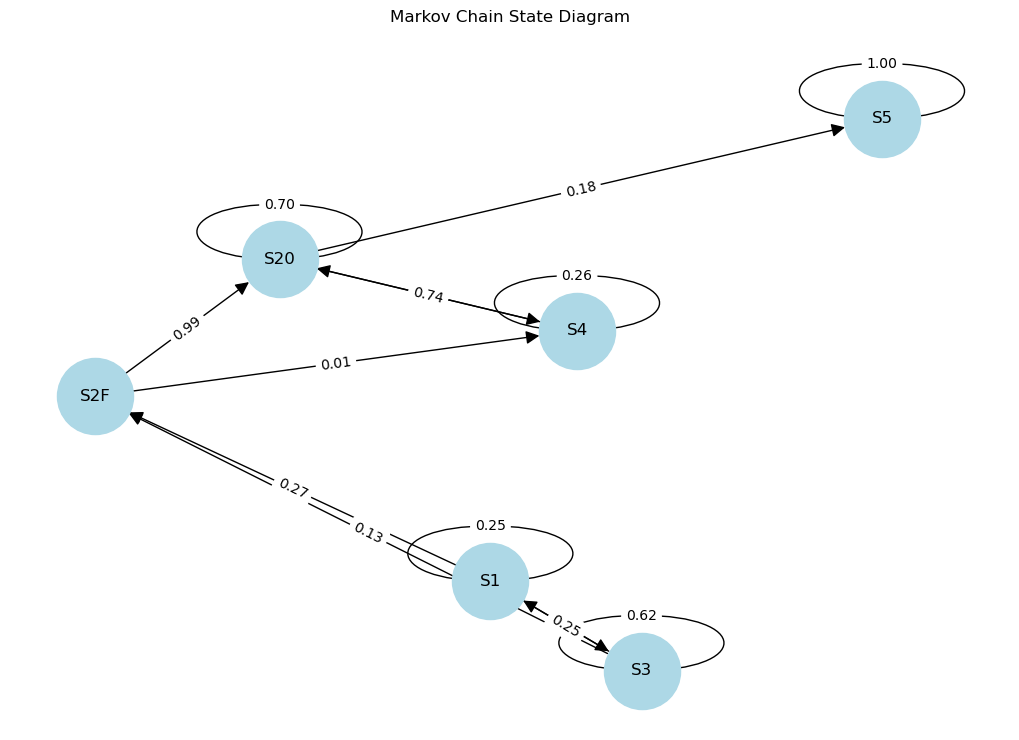

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Add nodes and weighted edges
for i in range(len(states)):
    for j in range(len(states)):
        if P[i][j] > 0:
            G.add_edge(states[i], states[j], weight=P[i][j])

# Position nodes using spring layout
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", arrowsize=20, font_size=12)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Markov Chain State Diagram")
plt.show()